In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import seaborn as sns

In [3]:
df = pd.read_csv('Median_Base_Salary_For_Sectors')
dfbs = pd.read_csv('Meidian_Base_Salary_for_Companies')
df

,Sectors,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,healthcare,62015.50,55900.0,58337.5,64011.00,61742.00,67631.50,64922.00,62700.00,63744.0,68046.00,66944.50,67925.00
1,consumer discretionary,50500.00,75557.5,75564.5,78681.25,51500.00,61455.75,62360.00,35360.00,29941.5,28746.00,28422.00,30940.00
2,industrials,72077.50,75400.0,76433.0,80911.00,87121.00,77763.25,79004.00,78104.00,71380.0,83026.75,83647.25,80054.00
3,material,77000.00,73980.0,77018.5,75070.00,74151.00,81250.00,80833.25,83701.50,85784.5,85218.00,88072.50,92142.00
4,consumer staple,80465.00,86074.0,81199.5,76426.00,75605.00,81837.50,60678.25,64383.00,52381.0,72188.75,79135.00,75163.50
5,financials,57086.75,57086.5,60364.5,56676.00,60420.00,60495.00,67806.25,68590.00,64870.0,72974.00,70440.00,70302.00
6,utility,81750.00,70681.0,70517.0,70434.00,79573.00,81336.50,83107.50,89102.50,82644.0,77600.00,83538.00,75865.00
7,real estate,NaN,NaN,NaN,NaN,47758.25,90190.75,67670.00,89071.75,107944.0,110104.00,80918.00,88175.25
8,energy,NaN,NaN,89875.0,77103.00,73342.00,78673.00,91034.50,96176.00,160000.0,144232.25,181422.50,103371.50
9,information technology,NaN,NaN,191744.0,146622.00,246362.00,NaN,85732.50,62326.50,89704.5,77245.00,91732.00,95000.00


# T test for base salary of sectors

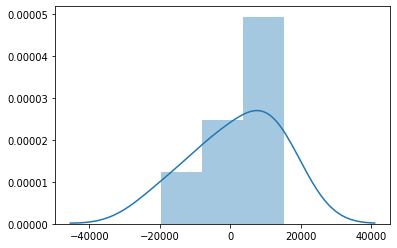

In [4]:
df_diff = df['2019']-df['2008']
df_diff = df_diff.dropna()
sns.distplot(df_diff)
plt.show()

Use one-side t test. 

Null hypothesis is there is increase in base salary between 2008 and 2019.

Alternative hypothesis is there is no increase in bace salary

In [5]:
def ttest_onesided(data):
    (t, p) = ttest_1samp(data, 0)
    if t > 0:
        onesided_p = 1 - p / 2
    else:
        onesided_p = p / 2
    return onesided_p
p_value = ttest_onesided(df_diff)
p_value

0.6305770006178205

According to p_value which is >0.5, so we accept null hypothesis which means there is increase in base salary between 2008 and 2019 

# histogram of the company-wise base salaries

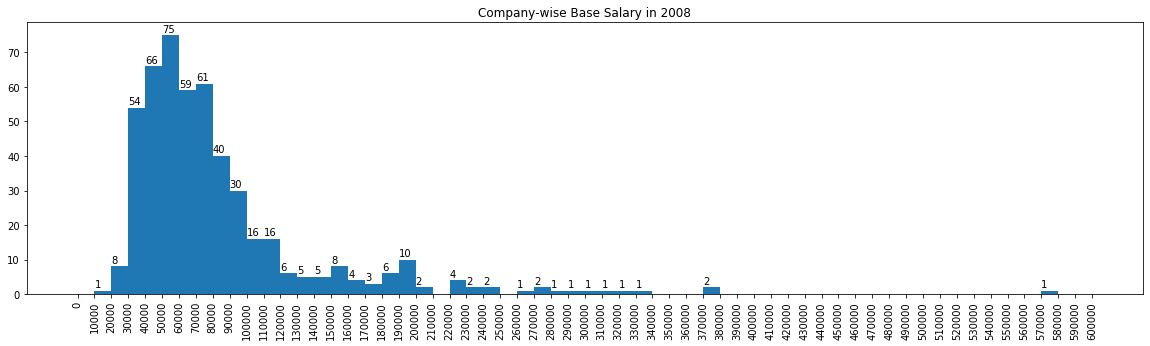

In [6]:
dfbs2008 = dfbs['2008'].dropna()
plt.figure(figsize=(20,5))
bin2008 = np.linspace(0, 600000, num=61)
(counts2008, bins2008, patch2008) = plt.hist(dfbs2008,bins = bin2008)
plt.title('Company-wise Base Salary in 2008')
plt.xticks(bin2008,rotation = 90)
for a,b in zip(bin2008,counts2008):
    if b != 0:
        plt.text(a,b+1,'%.0f' % b)
plt.show()

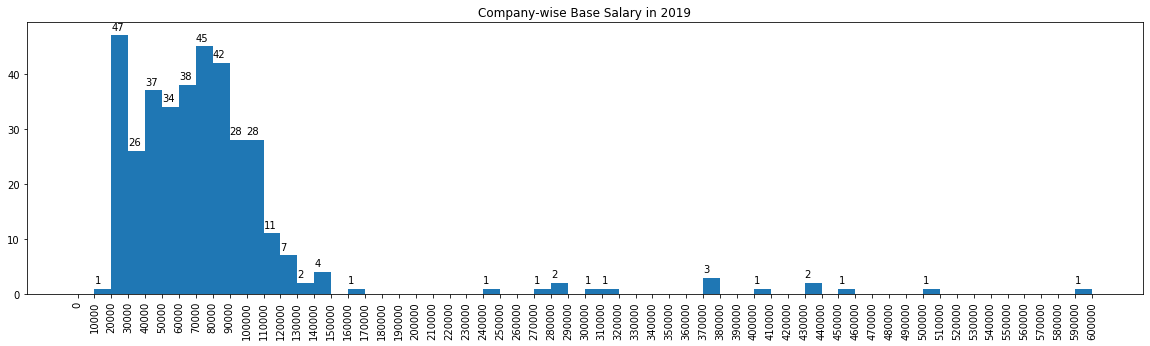

In [7]:
dfbs2019 = dfbs['2019'].dropna()
plt.figure(figsize=(20,5))
bin2019 = np.linspace(0, 600000, num=61)
(counts2019, bins2019, patch2019) = plt.hist(dfbs2019,bins = bin2019)
plt.title('Company-wise Base Salary in 2019')
plt.xticks(bin2019,rotation = 90)
for a,b in zip(bins2019,counts2019):
    if b != 0:
        plt.text(a,b+1,'%.0f' % b)
plt.show()

# line plot of the sector median values across time (Use 0 to represent missing value)

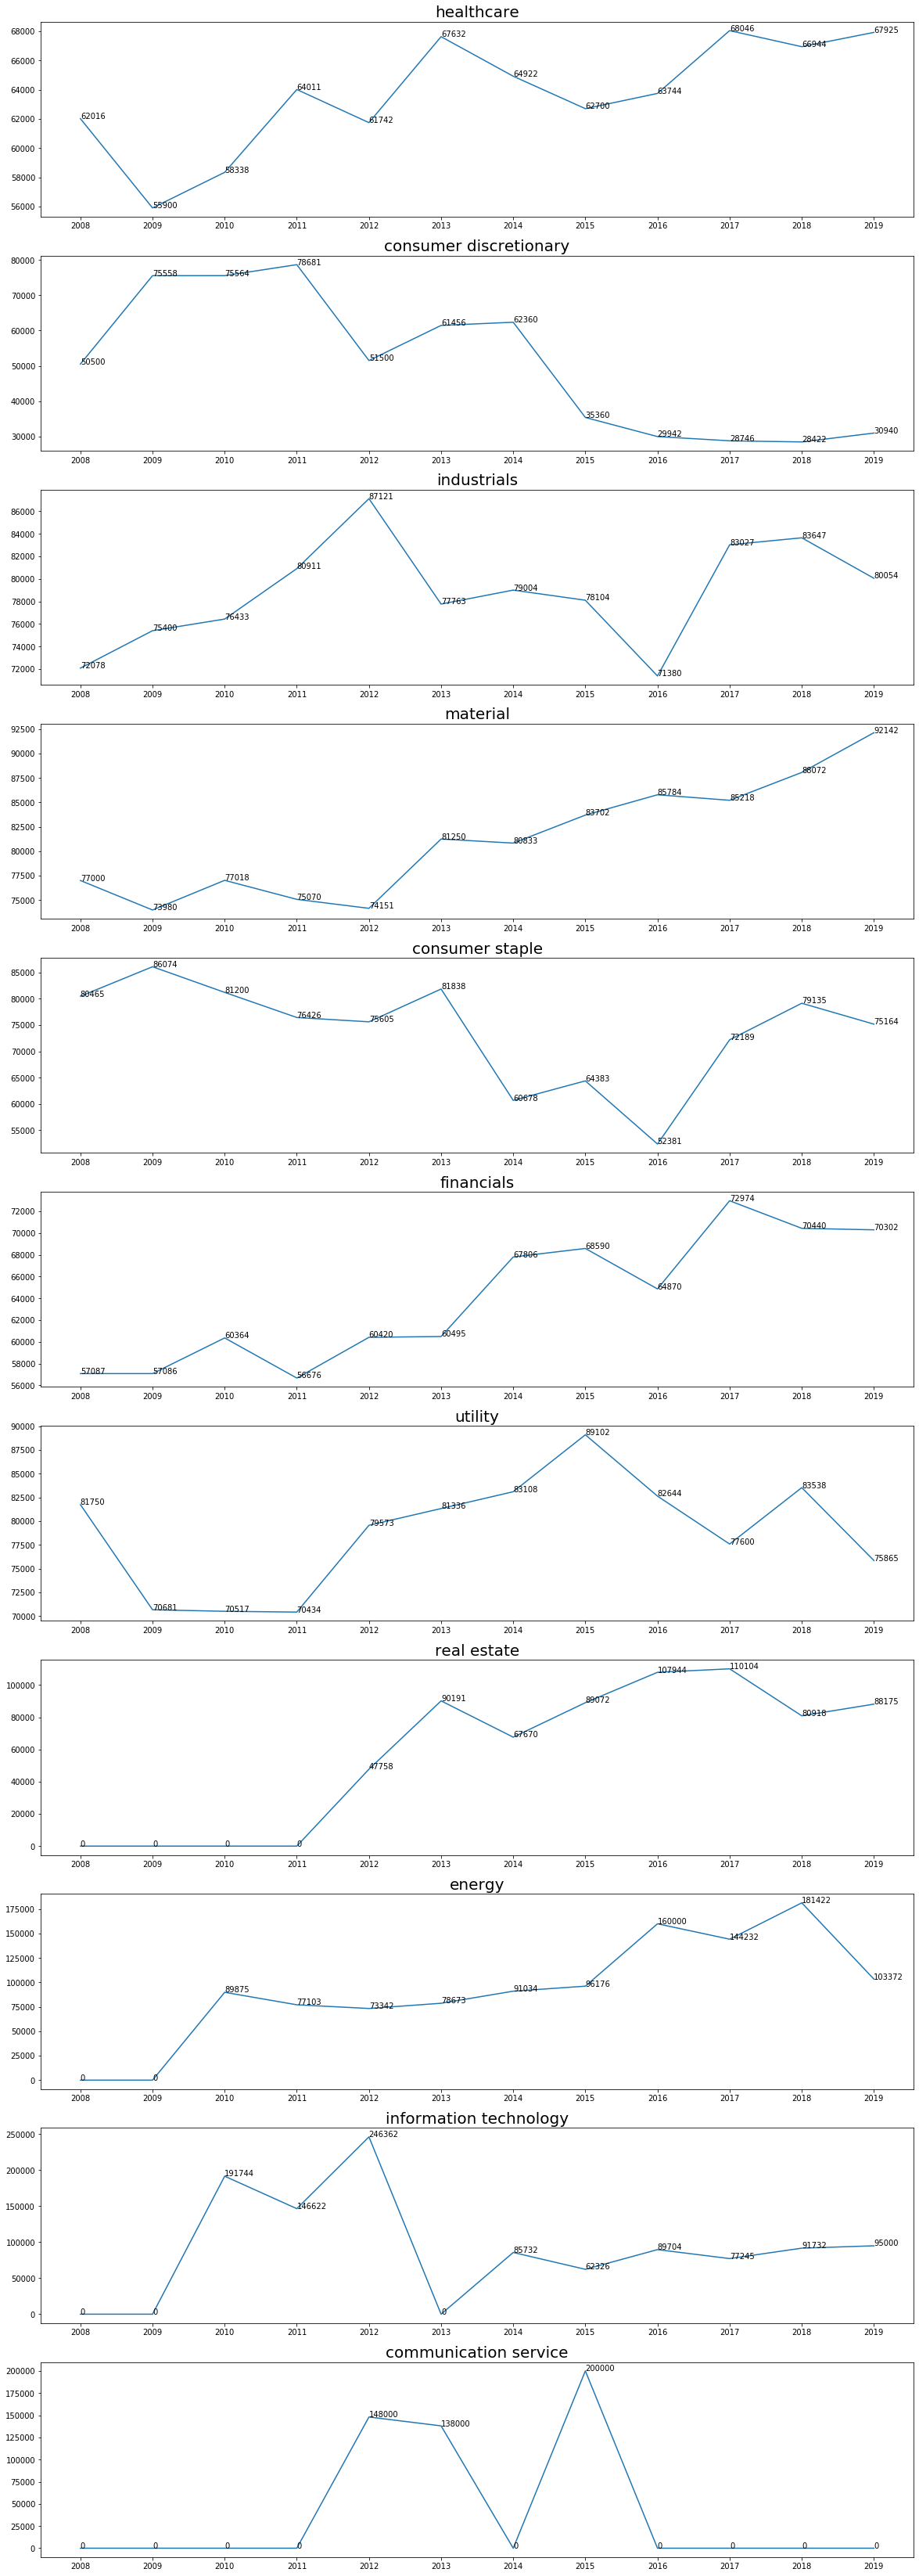

In [8]:
fig, axs = plt.subplots(11,figsize = (20,30))
plt.subplots_adjust(bottom = 1,top = 2.5)
year = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for i in range(len(df)):
    dfsecyear = df.iloc[i][1:]
    dfsecyear = dfsecyear.fillna(0)
    axs[i].plot(dfsecyear)
    for a,b in zip(year,dfsecyear):
        axs[i].text(a,b+1,'%.0f' % b)
    sec = df.iloc[i][0]
    axs[i].set_title(sec,fontsize = 20)
plt.show()